# Social Distancing Aggregate

This notebook aggregates the data generated by the notebook `social-distancing.ipynb`. See email `2021-07-08 16:19`.

## 1. Read data

In [1]:
import datetime
import pandas as pd

In [2]:
DATE_FORMAT = "%a %b %d %H:%M:%S %z %Y"
INPUT_DATA_FILE = "social-distancing-2020.csv"
# times are in UTC/GMT; summer time changes to winter time on the last Sunday in October
SURVEY_DATES = [["Mon Jun 22 22:00:00 +0000 2020", "Mon Jun 29 22:00:00 +0000 2020"],
                ["Mon Jun 29 22:00:00 +0000 2020", "Mon Jul 06 22:00:00 +0000 2020"],
                ["Mon Jul 06 22:00:00 +0000 2020", "Mon Jul 13 22:00:00 +0000 2020"],
                ["Mon Jul 13 22:00:00 +0000 2020", "Mon Jul 20 22:00:00 +0000 2020"],
                ["Mon Jul 20 22:00:00 +0000 2020", "Mon Jul 27 22:00:00 +0000 2020"],
                ["Mon Jul 27 22:00:00 +0000 2020", "Mon Aug 03 22:00:00 +0000 2020"],
                ["Mon Aug 03 22:00:00 +0000 2020", "Mon Aug 10 22:00:00 +0000 2020"],
                ["Mon Aug 10 22:00:00 +0000 2020", "Mon Aug 17 22:00:00 +0000 2020"],
                ["Mon Aug 17 22:00:00 +0000 2020", "Mon Aug 24 22:00:00 +0000 2020"],
                ["Mon Aug 24 22:00:00 +0000 2020", "Mon Aug 31 22:00:00 +0000 2020"],
                ["Mon Aug 31 22:00:00 +0000 2020", "Mon Sep 07 22:00:00 +0000 2020"],
                ["Mon Sep 07 22:00:00 +0000 2020", "Mon Sep 14 22:00:00 +0000 2020"],
                ["Mon Sep 14 22:00:00 +0000 2020", "Mon Sep 21 22:00:00 +0000 2020"],
                ["Mon Sep 21 22:00:00 +0000 2020", "Mon Sep 28 22:00:00 +0000 2020"],
                ["Mon Sep 28 22:00:00 +0000 2020", "Mon Oct 05 22:00:00 +0000 2020"],
                ["Mon Oct 05 22:00:00 +0000 2020", "Mon Oct 12 22:00:00 +0000 2020"],
                ["Mon Oct 12 22:00:00 +0000 2020", "Mon Oct 19 22:00:00 +0000 2020"],
                ["Mon Oct 19 22:00:00 +0000 2020", "Mon Oct 26 23:00:00 +0000 2020"],
                ["Mon Oct 26 23:00:00 +0000 2020", "Mon Nov 02 23:00:00 +0000 2020"],
                ["Mon Nov 02 23:00:00 +0000 2020", "Mon Nov 09 23:00:00 +0000 2020"],
                ["Mon Nov 09 23:00:00 +0000 2020", "Mon Nov 16 23:00:00 +0000 2020"]]

In [3]:
input_data_df = pd.read_csv(INPUT_DATA_FILE)

In [4]:
len(input_data_df)

320770

In [5]:
input_data_df.loc[0]

label                                  REJECTS
id_str                     1274099821041930240
user_id                              453382300
created_at      Fri Jun 19 22:00:43 +0000 2020
location                                   NaN
municipality                               NaN
province                                   NaN
country                                    NaN
Name: 0, dtype: object

## 2. Aggregate data

In [6]:
from IPython.display import clear_output

In [7]:
def squeal(text=None):
    clear_output(wait=True)
    if not text is None: print(text)

In [13]:
def get_counts(input_data_df, datetime_start, datetime_end, last_index=0):
    municipality_data = {}
    province_data = {}
    ids_part_municipalities = []
    ids_part_provinces = []
    for i in range(last_index, len(input_data_df)):
        tweet_datetime = datetime.datetime.strptime(input_data_df.loc[i]["created_at"], DATE_FORMAT)
        if tweet_datetime < datetime.datetime.strptime(datetime_start, DATE_FORMAT):
            continue
        if tweet_datetime >= datetime.datetime.strptime(datetime_end, DATE_FORMAT):
            break
        if not pd.isna(input_data_df.loc[i]["province"]):
            province = input_data_df.loc[i]["province"]
            if province not in province_data:
                province_data[province] = { "SUPPORTS": 0, "REJECTS": 0 }
            province_data[province][input_data_df.loc[i]["label"]] +=1
            ids_part_provinces.append([input_data_df.loc[i]["id_str"], input_data_df.loc[i]["label"]])
        if not pd.isna(input_data_df.loc[i]["municipality"]):
            municipality = input_data_df.loc[i]["municipality"]
            if municipality not in municipality_data:
                municipality_data[municipality] = { "SUPPORTS": 0, "REJECTS": 0 }
            municipality_data[municipality][input_data_df.loc[i]["label"]] +=1
            ids_part_municipalities.append([input_data_df.loc[i]["id_str"], input_data_df.loc[i]["label"]])
    return province_data, municipality_data, ids_part_provinces, ids_part_municipalities, i

In [16]:
province_data = {}
municipality_data = {}
ids_municipalities = []
ids_provinces = []
last_index = 0
for i in range(0, len(SURVEY_DATES)):
    province_data[i], municipality_data[i], ids_part_provinces, ids_part_municipalities, last_index = get_counts(input_data_df, SURVEY_DATES[i][0], SURVEY_DATES[i][1], last_index)
    ids_municipalities.extend(ids_part_municipalities)
    ids_provinces.extend(ids_part_provinces)
    squeal(i)

20


In [17]:
ids_municipalities[0]

[1275187044424331266, 'SUPPORTS']

Save ids for Chao et al. paper

In [19]:
pd.DataFrame(sorted(ids_municipalities)).to_csv("20211207_municipalities.csv", header=["id_str", "label"], index=None)
pd.DataFrame(sorted(ids_provinces)).to_csv("20211207_provinces.csv", header=["id_str", "label"], index=None)

In [11]:
for i in province_data:
    print(province_data[i]['Noord-Holland'])

{'SUPPORTS': 1364, 'REJECTS': 1094}
{'SUPPORTS': 690, 'REJECTS': 532}
{'SUPPORTS': 591, 'REJECTS': 352}
{'SUPPORTS': 737, 'REJECTS': 213}
{'SUPPORTS': 1629, 'REJECTS': 460}
{'SUPPORTS': 1008, 'REJECTS': 268}
{'SUPPORTS': 1222, 'REJECTS': 393}
{'SUPPORTS': 695, 'REJECTS': 219}
{'SUPPORTS': 1007, 'REJECTS': 259}
{'SUPPORTS': 941, 'REJECTS': 464}
{'SUPPORTS': 699, 'REJECTS': 385}
{'SUPPORTS': 427, 'REJECTS': 150}
{'SUPPORTS': 670, 'REJECTS': 234}
{'SUPPORTS': 910, 'REJECTS': 320}
{'SUPPORTS': 1135, 'REJECTS': 250}
{'SUPPORTS': 789, 'REJECTS': 228}
{'SUPPORTS': 993, 'REJECTS': 260}
{'SUPPORTS': 479, 'REJECTS': 132}
{'SUPPORTS': 509, 'REJECTS': 127}
{'SUPPORTS': 321, 'REJECTS': 66}
{'SUPPORTS': 276, 'REJECTS': 95}


In [12]:
for i in municipality_data:
    print(municipality_data[i]['Amsterdam'])

{'SUPPORTS': 779, 'REJECTS': 665}
{'SUPPORTS': 395, 'REJECTS': 343}
{'SUPPORTS': 373, 'REJECTS': 228}
{'SUPPORTS': 464, 'REJECTS': 134}
{'SUPPORTS': 1020, 'REJECTS': 277}
{'SUPPORTS': 558, 'REJECTS': 162}
{'SUPPORTS': 709, 'REJECTS': 225}
{'SUPPORTS': 417, 'REJECTS': 146}
{'SUPPORTS': 607, 'REJECTS': 154}
{'SUPPORTS': 576, 'REJECTS': 256}
{'SUPPORTS': 416, 'REJECTS': 245}
{'SUPPORTS': 256, 'REJECTS': 100}
{'SUPPORTS': 361, 'REJECTS': 146}
{'SUPPORTS': 529, 'REJECTS': 196}
{'SUPPORTS': 689, 'REJECTS': 169}
{'SUPPORTS': 443, 'REJECTS': 159}
{'SUPPORTS': 554, 'REJECTS': 167}
{'SUPPORTS': 280, 'REJECTS': 70}
{'SUPPORTS': 314, 'REJECTS': 73}
{'SUPPORTS': 194, 'REJECTS': 38}
{'SUPPORTS': 152, 'REJECTS': 58}


## 3. Write output files

In [13]:
import statistics

In [14]:
MUNICIPALITY_FILE = "csv/84992NED_Municipalities.csv"
# municipality from tweets: municipality from file
ALIASES = { "Den Haag": "'s-Gravenhage",
            "De Friese Meren": "De Fryske Marren",
            "Dantumadeel": "Dantumadiel",
            "Tietjerksteradeel": "Tytsjerksteradiel",
          }

In [15]:
provinces_dict = { 'Noord-Holland': 'PV27', 'Zuid-Holland': 'PV28', 'Zeeland': 'PV29', 'Noord-Brabant': 'PV30', 
                   'Utrecht': 'PV26', 'Flevoland': 'PV24', 'Friesland': 'PV21', 'Groningen': 'PV20', 
                   'Drenthe': 'PV22', 'Overijssel': 'PV23', 'Gelderland': 'PV25', 'Limburg': 'PV31' }

In [16]:
def datetime2file_name(datetime_string):
    datetime_date = datetime.datetime.strptime(datetime_string, DATE_FORMAT)
    return str(datetime_date.year) + str(datetime_date.month).zfill(2) + str(datetime_date.day).zfill(2)

In [17]:
def compute_sds(data_df):
    sds = []
    for area in data_df.index:
        if int(data_df.loc[area]["SUPPORTS"]) + int(data_df.loc[area]["REJECTS"]) > 1:
            sds.append(statistics.stdev(int(data_df.loc[area]["SUPPORTS"]) * [1] + int(data_df.loc[area]["REJECTS"]) * [0]))
        else:
            sds.append(0.0)
    return sds

In [18]:
def read_municipalities():
    municipality_file_data = pd.read_csv(MUNICIPALITY_FILE, sep=";")
    municipality_dict = {}
    for i in range(0, len(municipality_file_data)):
        if municipality_file_data.iloc[i]["Naam_2"].strip() not in municipality_dict:
            municipality_dict[municipality_file_data.iloc[i]["Naam_2"].strip()] = municipality_file_data.iloc[i]["Code_3"].strip()
        elif municipality_file_data.iloc[i]["Code_3"].strip() != municipality_dict[municipality_file_data.iloc[i]["Naam_2"].strip()]:
            print("unexpected data in municipality file: {municipality_file_data.iloc[i][\"Naam_2\"].strip()} {municipality_dict[municipality_file_data.iloc[i][\"Naam_2\"].strip()]} {municipality_file_data.iloc[i][\"Code_3\"].strip()}")
    return municipality_dict

In [19]:
def store_data(data_df, file_name, data_type, statcode_dict={}):
    data_df.index.name = "name"
    data_df["stat_code"] = len(data_df) * [""]
    data_df["tweet_amount"] = data_df["SUPPORTS"] + data_df["REJECTS"]
    data_df["stance_mean"] = data_df["SUPPORTS"] / (data_df["SUPPORTS"] + data_df["REJECTS"])
    data_df["stance_sd"] = compute_sds(data_df)
    data_df["stance_max"] = len(data_df) * [1]
    data_df["stance_min"] = len(data_df) * [0]
    del data_df["SUPPORTS"]
    del data_df["REJECTS"]
    stat_codes = []
    for i in range(0, len(data_df)):
        if data_df.iloc[i].name in statcode_dict:
            stat_codes.append(statcode_dict[data_df.iloc[i].name])
        elif data_df.iloc[i].name in ALIASES and ALIASES[data_df.iloc[i].name] in statcode_dict:
            stat_codes.append(statcode_dict[ALIASES[data_df.iloc[i].name]])
        else:
            stat_codes.append(data_df.iloc[i].name)
            print(f"unknown area in {data_type}: {data_df.iloc[i].name}")
    data_df["stat_code"] = stat_codes
    data_df.sort_values(by="name").to_csv(f"tweet_data/{file_name}_{data_type}.csv")

In [21]:
municipalities_dict = read_municipalities()
for i in range(0, len(SURVEY_DATES)):
    file_name = datetime2file_name(SURVEY_DATES[i][0])
    store_data(pd.DataFrame(province_data[i]).T, file_name, "provinces", statcode_dict=provinces_dict)
    store_data(pd.DataFrame(municipality_data[i]).T, file_name, "municipalities", statcode_dict=municipalities_dict)

## 4. Graph

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
DATA_FILE = "csv/distance.csv"
START_DATE = 20200630
NBR_OF_WEEKS = 20
NBR_OF_DAYS_PER_WEEK = 7

In [34]:
counts_per_date = pd.read_csv(DATA_FILE, header=None)

In [58]:
week_counts = []
for i in range(0, len(counts_per_date)):
    if counts_per_date.iloc[i][0] == START_DATE:
        for j in range(i, i + NBR_OF_WEEKS * NBR_OF_DAYS_PER_WEEK, NBR_OF_DAYS_PER_WEEK):
            initial_week_date = counts_per_date.iloc[j][0]
            nbr_of_tweets = 0
            for k in range(j, j + NBR_OF_DAYS_PER_WEEK):
                nbr_of_tweets += counts_per_date.iloc[k][1]
            week_counts.append(nbr_of_tweets)
            print(initial_week_date, nbr_of_tweets)

20200630 20903
20200707 15613
20200714 14964
20200721 30486
20200728 22780
20200804 23370
20200811 15129
20200818 19198
20200825 28551
20200901 21147
20200908 11634
20200915 17141
20200922 22343
20200929 21223
20201006 18129
20201013 22256
20201020 12477
20201027 12126
20201103 7713
20201110 7668


In [64]:
initial_id = 150
start_date_check = counts_per_date.iloc[initial_id][0]
first_week_count_check = sum([x[1] for i,x in counts_per_date.iloc[initial_id:initial_id+7].iterrows()])
last_week_count_check = sum([x[1] for i,x in counts_per_date.iloc[initial_id+19*7:initial_id+20*7].iterrows()])
nbr_of_weeks_check = len(week_counts)

def check(test):
    if test: return "correct"
    else: return "wrong"

print(f"Checks:\nfirst date: {start_date_check} {check(start_date_check == START_DATE)}")
print(f"first week count: {first_week_count_check} {check(first_week_count_check == week_counts[0])}")
print(f"last week count: {last_week_count_check} {check(last_week_count_check == week_counts[-1])}")
print(f"number of weeks: {nbr_of_weeks_check} {check(nbr_of_weeks_check == NBR_OF_WEEKS)}")

Checks:
first date: 20200630 correct
first week count: 20903 correct
last week count: 7668 correct
number of weeks: 20 correct


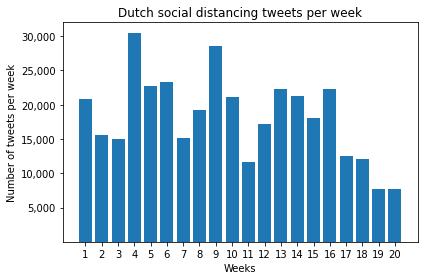

In [87]:
plt.bar(range(1, 1+len(week_counts)), week_counts)
plt.xticks(range(1, 1+len(week_counts)))
plt.yticks(range(5000, 35000, 5000), ["5,000", "10,000", "15,000", "20,000", "25,000", "30,000"])
plt.title("Dutch social distancing tweets per week")
plt.xlabel("Weeks")
plt.ylabel("Number of tweets per week")
plt.tight_layout()
plt.savefig("distance-weeks.png")
plt.show()

In [76]:
print(f"total number of tweets: {sum(week_counts)}")

total number of tweets: 364851
